# Application Data Analysis

## Data Reading and summary

In [1]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#To display maximum rows and columns for better readability

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
application = pd.read_csv(r'F:\Credit_EDA\application_data.csv')

In [5]:
# Check the number of rows and columns in the dataframe

application.shape

(307511, 122)

In [6]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
application.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

## Data Quality Check and Missing values

#### Find the percentage of missing values for all the columns.

In [8]:
application.isnull().sum()/len(application)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

#### Remove columns with high missing percentage

In [9]:
missing_perct = application.isnull().sum()/len(application)*100

In [10]:
# After checking all the columns we found out 47% to be the threshold value, 
# therefore we created a Series which contains all the columns having NULL value more than 47%


Drop_columns=missing_perct[missing_perct>47]

#Dropping all the columns 

application=application.drop(Drop_columns.index.to_list(),axis=1)


In [11]:
# Checking if the missing column with high percentage are dropped
application.isnull().sum()/len(application)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

#### Data Imputation - Only demonstration, Imputation has been performed on th copy of original dataframe 

In [12]:
## To demonstrate the imputation. Imputation has been performed on th copy of original dataframe 
## (application_cp).

In [13]:
application_cp = application.copy(deep = True)

In [14]:
#Filling the missing values with median

application_cp['EXT_SOURCE_3'].fillna(application_cp['EXT_SOURCE_3'].median(), inplace = True)

application_cp['EXT_SOURCE_2'].fillna(application_cp['EXT_SOURCE_2'].median(), inplace = True)



In [15]:
#Finding the mode of the column to replace the missing values
Occ_mode = application_cp['OCCUPATION_TYPE'].mode()[0]

#Filling the missing values with mode

application_cp['OCCUPATION_TYPE'].fillna(Occ_mode,inplace=True)

In [16]:
#The below columns and their respective percentage of missing values

m_list = ['AMT_REQ_CREDIT_BUREAU_HOUR',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR',
'OBS_30_CNT_SOCIAL_CIRCLE',
'DEF_30_CNT_SOCIAL_CIRCLE',
'OBS_60_CNT_SOCIAL_CIRCLE',
'DEF_60_CNT_SOCIAL_CIRCLE']
for x in m_list:
    application_cp[x].fillna(application_cp[x].median(),inplace=True)

In [17]:
application_cp.isnull().sum()/len(application)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


#### Checking the datatypes and resolving

In [18]:
# Check the column-wise info of the dataframe and checking if there are any incorrect data type assigned

application.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [19]:
#Changing DAYS_REGISTRATION to int64
application['DAYS_REGISTRATION']=application.DAYS_REGISTRATION.astype('int64') 


In [20]:
#Changing the name of the value to 'Secondary' from 'Secondary / secondary special'

application['NAME_EDUCATION_TYPE'] = application['NAME_EDUCATION_TYPE'].apply(lambda x: 'Secondary' if x=='Secondary / secondary special' else x)

#Changing the name of the value to 'Single' from 'Single / not married'

application['NAME_FAMILY_STATUS'] = application['NAME_FAMILY_STATUS'].apply(lambda x: 'Single' if x=='Single / not married' else x)

In [21]:
#Taking care of the columns values where Days were as negative values


application['DAYS_BIRTH']=application['DAYS_BIRTH'].apply(lambda x: abs(x))
application['DAYS_EMPLOYED']=application['DAYS_EMPLOYED'].apply(lambda x: abs(x))
application['DAYS_REGISTRATION']=application['DAYS_REGISTRATION'].apply(lambda x: abs(x))
application['DAYS_ID_PUBLISH']=application['DAYS_ID_PUBLISH'].apply(lambda x: abs(x))


#### Outlier analysis

In [22]:
#To identify the numerical columns

application.nunique().sort_values()

REG_CITY_NOT_LIVE_CITY              2
FLAG_EMAIL                          2
FLAG_DOCUMENT_9                     2
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_16                    2
FLAG_DOCUMENT_15                    2
FLAG_PHONE                          2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_12                    2
FLAG_DOCUMENT_11                    2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_13                    2
FLAG_CONT_MOBILE                    2
FLAG_DOCUMENT_10                    2
FLAG_EMP_PHONE                      2
FLAG_MOBIL                          2
FLAG_DOCUMEN

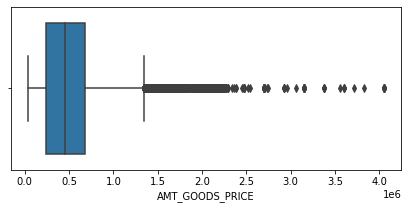

4050000.0

In [23]:
#Trying to find the Outliers

plt.figure(figsize=(7,3))
sns.boxplot(application['AMT_GOODS_PRICE'])
plt.show()


#There are few Outliers in the AMT_GOODS_PRICE but they are not discrete

application['AMT_GOODS_PRICE'].max()

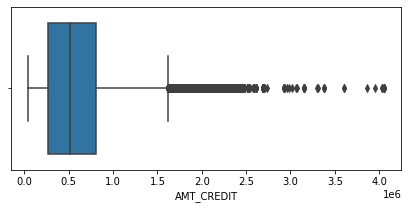

4050000.0

In [24]:
#Trying to find the Outliers

plt.figure(figsize=(7,3))
sns.boxplot(application['AMT_CREDIT'])
plt.show()


#There are few Outliers in the AMT_CREDIT but they are not discrete

application['AMT_CREDIT'].max()

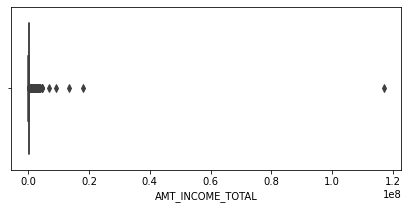

117000000.0

In [25]:
#Trying to find the Outliers

plt.figure(figsize=(7,3))
sns.boxplot(application['AMT_INCOME_TOTAL'])
plt.show()


#There is one value Outlier in the AMT_INCOME_TOTAL - 117000000.0

application['AMT_INCOME_TOTAL'].max()

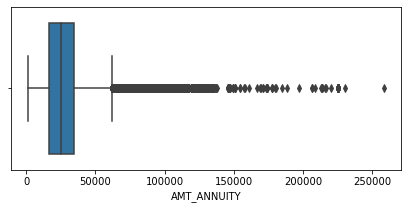

258025.5

In [26]:
#Trying to find the Outliers

plt.figure(figsize=(7,3))
sns.boxplot(application['AMT_ANNUITY'])
plt.show()


#There are few Outliers in the AMT_ANNUITY but they are not discrete

application['AMT_ANNUITY'].max()

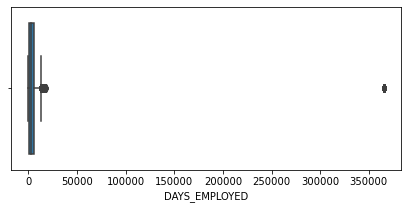

365243

In [27]:
#Trying to find the Outliers

plt.figure(figsize=(7,3))
sns.boxplot(application['DAYS_EMPLOYED'])
plt.show()


#There is one outlier in DAYS_EMPLOYED.

application['DAYS_EMPLOYED'].max()

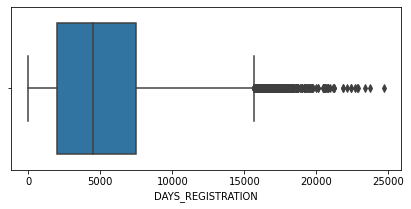

24672

In [28]:
#Trying to find the Outliers

plt.figure(figsize=(7,3))
sns.boxplot(application['DAYS_REGISTRATION'])
plt.show()


#There are few Outliers in the DAYS_REGISTRATION but they are not discrete.

application['DAYS_REGISTRATION'].max()

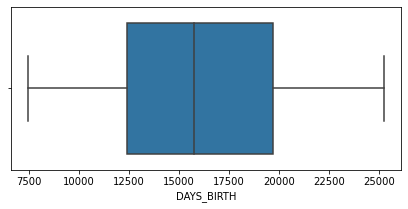

25229

In [29]:
#Trying to find the Outliers

plt.figure(figsize=(7,3))
sns.boxplot(application['DAYS_BIRTH'])
plt.show()


#There are no outlier in Days_Birth. 

application['DAYS_BIRTH'].max()

In [30]:
#To compare the higher percentiles and max values, to identify the presence of outliers

application[['AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE','AMT_INCOME_TOTAL']].describe()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL
count,307499.000000,3.075110e+05,3.072330e+05,3.075110e+05
mean,27108.573909,5.990260e+05,5.383962e+05,1.687979e+05
std,14493.737315,4.024908e+05,3.694465e+05,2.371231e+05
min,1615.500000,4.500000e+04,4.050000e+04,2.565000e+04
25%,16524.000000,2.700000e+05,2.385000e+05,1.125000e+05
50%,24903.000000,5.135310e+05,4.500000e+05,1.471500e+05
75%,34596.000000,8.086500e+05,6.795000e+05,2.025000e+05
max,258025.500000,4.050000e+06,4.050000e+06,1.170000e+08


#### Binning of continuous variables. 

In [31]:
## Binning the birth date 
## Converting days birth into year
application['DAYS_BIRTH'] = application['DAYS_BIRTH']/365
application['DAYS_BIRTH'].describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [32]:
#Creating different bins- ["20Y-30Y","30Y-40Y","40Y-50Y","50Y-60Y","60Y-70Y"]
#From DAY_BIRTH column 

application['AGE_GROUP'] = pd.cut(application['DAYS_BIRTH'],bins=[20,30,40,50,60,70] , labels = ["20Y-30Y","30Y-40Y","40Y-50Y","50Y-60Y","60Y-70Y"])


In [33]:
## Binning the days employed
## Converting days employed into year
application['DAYS_EMPLOYED'] = application['DAYS_EMPLOYED']/365
application['DAYS_EMPLOYED'].describe()

count    307511.000000
mean        185.547239
std         382.037676
min           0.000000
25%           2.556164
50%           6.079452
75%          15.635616
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

In [34]:
#Creating different bins- ["<20Y","20Y-40Y","40Y-60Y","60Y-80Y",">80Y"]
#From DAYS_EMPLOYED column 

application['EMPLOYMENT_GROUP'] = pd.qcut(application['DAYS_EMPLOYED'],q=[0, .2, .4, .6,.8, 1.] , labels = ["<20Y","20Y-40Y","40Y-60Y","60Y-80Y",">80Y"])

## Data analysis and visualization

#### Check the Imbalance percentage

In [35]:
#Identifying the imbalance percentage in TARGET 0 and TARGET 1

application['TARGET'].value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

#### Categorical analysis

In [36]:
#Creating font variables to be used for Titles and Labels 

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

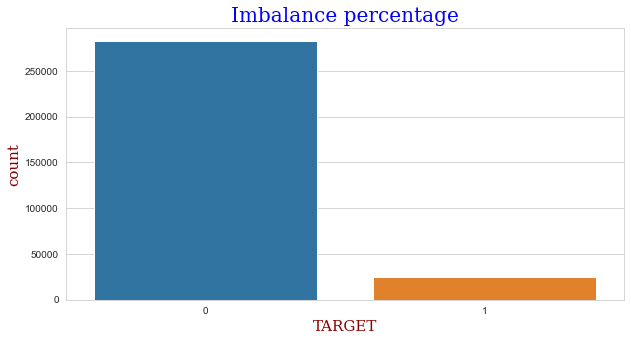

In [37]:
#Visualizing the imbalance % of TARGET variable.

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title("Imbalance percentage",fontdict=font1)
plt.xlabel("TARGET",fontdict = font2)
plt.ylabel("COUNT",fontdict = font2)
sns.countplot(x=application['TARGET'], data=application)
plt.show()

In [38]:
#Segregating data frame into two different dataframes for TARGET 0 and TARGET 1 

target_0 = application[application['TARGET']==0]
target_1 = application[application['TARGET']==1]

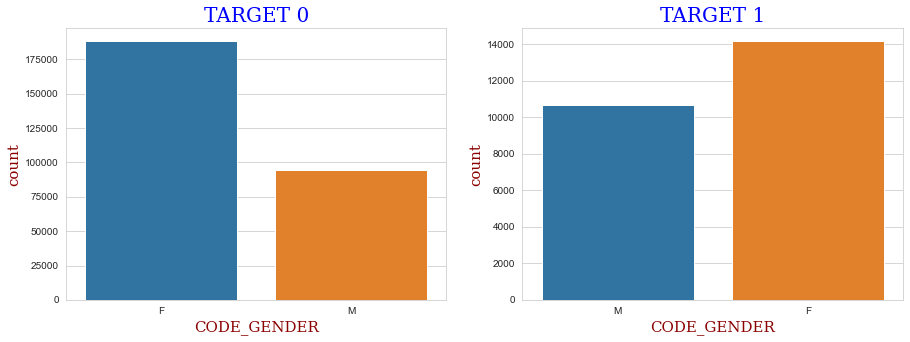

In [39]:
#Visualizing Code_gender for TARGET 0 and TARGET 1

sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('TARGET 0',fontdict=font1)
plt.xlabel("CODE_GENDER",fontdict = font2)
plt.ylabel("COUNT",fontdict = font2)
sns.countplot(x=target_0[(target_0['CODE_GENDER'] == 'M') | (target_0['CODE_GENDER'] == 'F')]['CODE_GENDER'], data=target_0[(target_0['CODE_GENDER'] == 'M') | (target_0['CODE_GENDER'] == 'F')])
plt.subplot(1,2,2)
plt.title('TARGET 1',fontdict=font1)
plt.xlabel("CODE_GENDER",fontdict = font2)
plt.ylabel("COUNT",fontdict = font2)
sns.countplot(x=target_1['CODE_GENDER'], data=target_1)
plt.show()

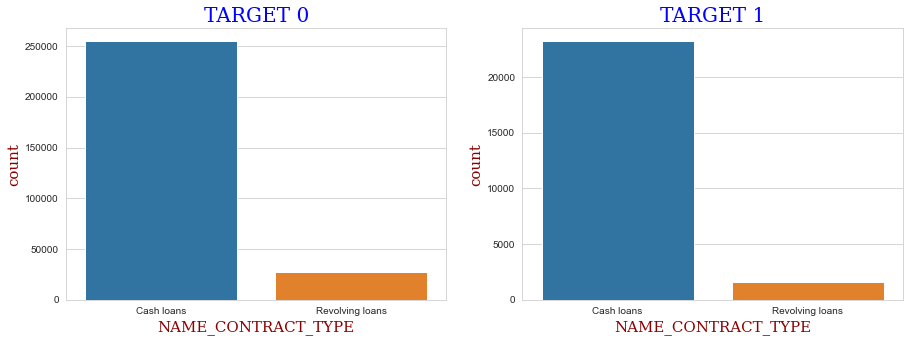

In [40]:
#Visualizing NAME_CONTRACT_TYPE for TARGET 0 and TARGET 1

sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('TARGET 0',fontdict=font1)
plt.xlabel("NAME_CONTRACT_TYPE",fontdict = font2)
plt.ylabel("COUNT",fontdict = font2)
sns.countplot(x=target_0['NAME_CONTRACT_TYPE'], data=target_0)
plt.subplot(1,2,2)
plt.title('TARGET 1',fontdict=font1)
plt.xlabel("NAME_CONTRACT_TYPE",fontdict = font2)
plt.ylabel("COUNT",fontdict = font2)
sns.countplot(x=target_1['NAME_CONTRACT_TYPE'], data=target_1)
plt.show()

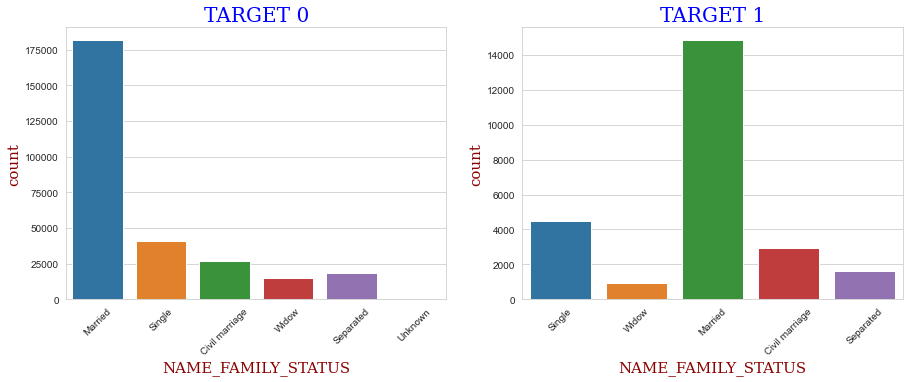

In [41]:
#Visualizing NAME_FAMILY_STATUS for TARGET 0 and TARGET 1

sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('TARGET 0',fontdict=font1)
plt.xticks(rotation=45)
plt.xlabel("NAME_FAMILY_STATUS",fontdict = font2)
plt.ylabel("COUNT",fontdict = font2)
sns.countplot(x=target_0['NAME_FAMILY_STATUS'], data=target_0)
plt.subplot(1,2,2)
plt.title('TARGET 1',fontdict=font1)
plt.xticks(rotation=45)
plt.xlabel("NAME_FAMILY_STATUS",fontdict = font2)
plt.ylabel("COUNT",fontdict = font2)
sns.countplot(x=target_1['NAME_FAMILY_STATUS'], data=target_1)
plt.show()

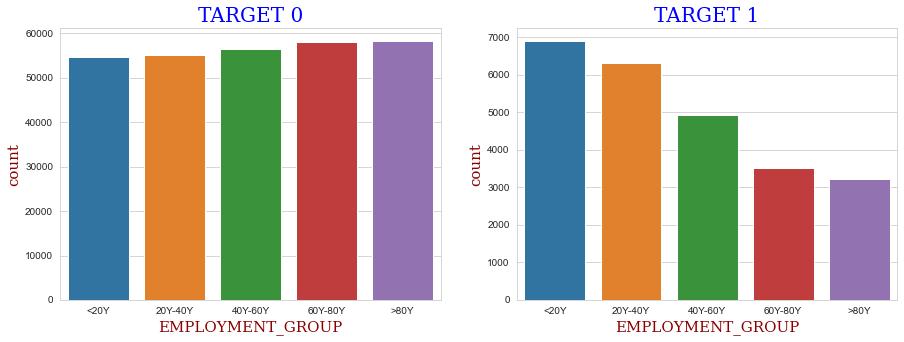

In [42]:
#Visualizing EMPLOYMENT_GROUP for TARGET 0 and TARGET 1

sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('TARGET 0',fontdict=font1)
plt.xlabel("EMPLOYMENT_GROUP",fontdict = font2)
plt.ylabel("COUNT",fontdict = font2)
sns.countplot(x=target_0['EMPLOYMENT_GROUP'], data=target_0)
plt.subplot(1,2,2)
plt.title('TARGET 1',fontdict=font1)
plt.xlabel("EMPLOYMENT_GROUP",fontdict = font2)
plt.ylabel("COUNT",fontdict = font2)
sns.countplot(x=target_1['EMPLOYMENT_GROUP'], data=target_1)
plt.show()

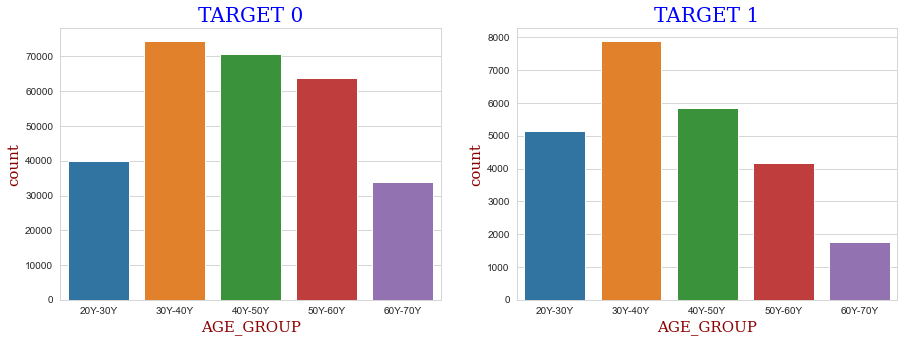

In [43]:
#Visualizing AGE_GROUP for TARGET 0 and TARGET 1

sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('TARGET 0',fontdict=font1)
plt.xlabel("AGE_GROUP",fontdict = font2)
plt.ylabel("COUNT",fontdict = font2)
sns.countplot(x=target_0['AGE_GROUP'], data=target_0)
plt.subplot(1,2,2)
plt.title('TARGET 1',fontdict=font1)
plt.xlabel("AGE_GROUP",fontdict = font2)
plt.ylabel("COUNT",fontdict = font2)
sns.countplot(x=target_1['AGE_GROUP'], data=target_1)
plt.show()

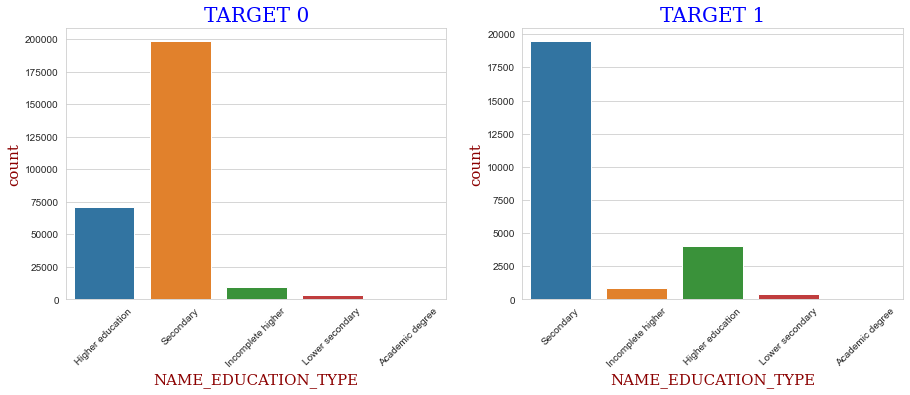

In [44]:
#Visualizing NAME_EDUCATION_TYPE for TARGET 0 and TARGET 1

sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('TARGET 0',fontdict=font1)
plt.xlabel("NAME_EDUCATION_TYPE",fontdict = font2)
plt.ylabel("COUNT",fontdict = font2)
plt.xticks(rotation=45)
sns.countplot(x=target_0['NAME_EDUCATION_TYPE'], data=target_0)
plt.subplot(1,2,2)
plt.title('TARGET 1',fontdict=font1)
plt.xticks(rotation=45)
plt.xlabel("NAME_EDUCATION_TYPE",fontdict = font2)
plt.ylabel("COUNT",fontdict = font2)
sns.countplot(x=target_1['NAME_EDUCATION_TYPE'], data=target_1)
plt.show()

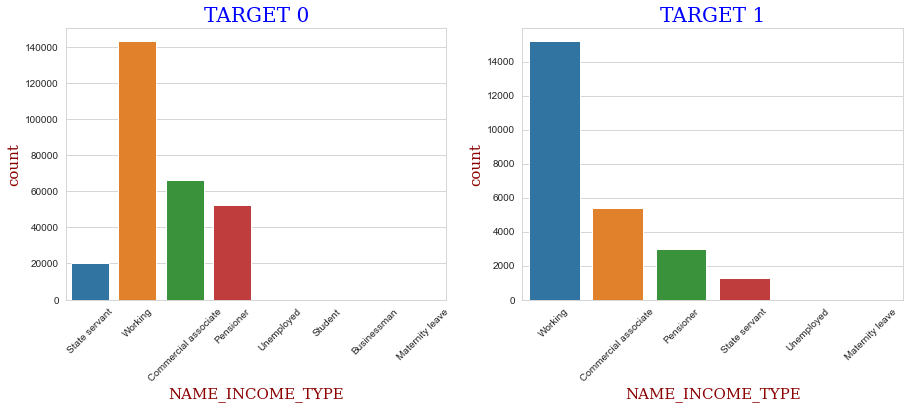

In [45]:
#Visualizing NAME_INCOME_TYPE for TARGET 0 and TARGET 1

sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('TARGET 0',fontdict=font1)
plt.xlabel("NAME_INCOME_TYPE",fontdict = font2)
plt.ylabel("COUNT",fontdict = font2)
plt.xticks(rotation=45)
sns.countplot(x=target_0['NAME_INCOME_TYPE'], data=target_0)
plt.subplot(1,2,2)
plt.title('TARGET 1',fontdict=font1)
plt.xlabel("NAME_INCOME_TYPE",fontdict = font2)
plt.ylabel("COUNT",fontdict = font2)
plt.xticks(rotation=45)
sns.countplot(x=target_1['NAME_INCOME_TYPE'], data=target_1)
plt.show()

#### Correlation

In [46]:
# Correlation for 10 variables in target 1

corr_target1 = target_1[['REGION_POPULATION_RELATIVE','AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_CREDIT',\
          'DAYS_ID_PUBLISH','DAYS_EMPLOYED','AMT_ANNUITY','DAYS_REGISTRATION','DAYS_BIRTH']]
corr_target1_df = corr_target1.corr()
corr_target1_df


,REGION_POPULATION_RELATIVE,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_ID_PUBLISH,DAYS_EMPLOYED,AMT_ANNUITY,DAYS_REGISTRATION,DAYS_BIRTH
REGION_POPULATION_RELATIVE,1.000000,0.076049,0.009135,0.069161,0.015537,0.015532,0.071690,0.056222,0.048190
AMT_GOODS_PRICE,0.076049,1.000000,0.037583,0.983103,0.056086,0.006642,0.752699,0.025679,0.135810
AMT_INCOME_TOTAL,0.009135,0.037583,1.000000,0.038131,0.004215,-0.014977,0.046421,-0.000158,-0.003096
AMT_CREDIT,0.069161,0.983103,0.038131,1.000000,0.052329,0.001930,0.752195,0.025854,0.135316
DAYS_ID_PUBLISH,0.015537,0.056086,0.004215,0.052329,1.000000,0.229090,0.016767,0.096833,0.252863
DAYS_EMPLOYED,0.015532,0.006642,-0.014977,0.001930,0.229090,1.000000,-0.081207,0.192455,0.582185
AMT_ANNUITY,0.071690,0.752699,0.046421,0.752195,0.016767,-0.081207,1.000000,-0.034279,0.014303
DAYS_REGISTRATION,0.056222,0.025679,-0.000158,0.025854,0.096833,0.192455,-0.034279,1.000000,0.289114
DAYS_BIRTH,0.048190,0.135810,-0.003096,0.135316,0.252863,0.582185,0.014303,0.289114,1.000000


In [47]:
# Correlation for 10 variables in target 0

corr_target0 = target_0[['REGION_POPULATION_RELATIVE','AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_CREDIT',\
          'DAYS_ID_PUBLISH','DAYS_EMPLOYED','AMT_ANNUITY','DAYS_REGISTRATION','DAYS_BIRTH']]
corr_target0_df = corr_target0.corr()
corr_target0_df

,REGION_POPULATION_RELATIVE,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_ID_PUBLISH,DAYS_EMPLOYED,AMT_ANNUITY,DAYS_REGISTRATION,DAYS_BIRTH
REGION_POPULATION_RELATIVE,1.000000,0.103827,0.167851,0.100604,0.001071,-0.007198,0.120988,0.052083,0.025244
AMT_GOODS_PRICE,0.103827,1.000000,0.349462,0.987250,0.003649,-0.068609,0.776686,-0.015916,0.044565
AMT_INCOME_TOTAL,0.167851,0.349462,1.000000,0.342799,-0.022896,-0.140392,0.418953,-0.064937,-0.062609
AMT_CREDIT,0.100604,0.987250,0.342799,1.000000,0.001464,-0.070104,0.771309,-0.013477,0.047378
DAYS_ID_PUBLISH,0.001071,0.003649,-0.022896,0.001464,1.000000,0.276663,-0.014113,0.100236,0.271314
DAYS_EMPLOYED,-0.007198,-0.068609,-0.140392,-0.070104,0.276663,1.000000,-0.104978,0.214511,0.626114
AMT_ANNUITY,0.120988,0.776686,0.418953,0.771309,-0.014113,-0.104978,1.000000,-0.039436,-0.012263
DAYS_REGISTRATION,0.052083,-0.015916,-0.064937,-0.013477,0.100236,0.214511,-0.039436,1.000000,0.333151
DAYS_BIRTH,0.025244,0.044565,-0.062609,0.047378,0.271314,0.626114,-0.012263,0.333151,1.000000


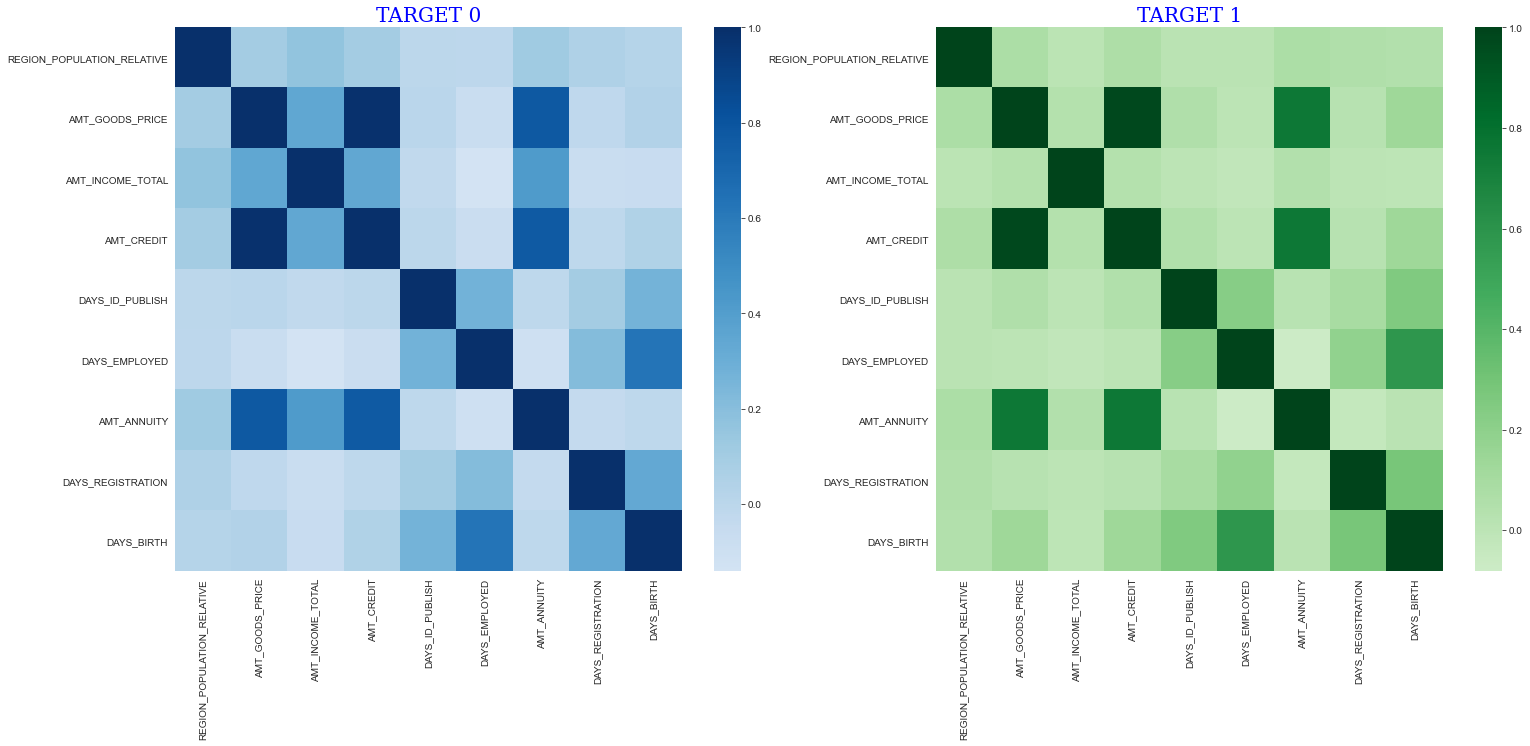

In [48]:
#Visualizing correlation for TARGET 0 and TARGET 1

sns.set_style('whitegrid')
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.title('TARGET 0',fontdict=font1)
sns.heatmap(corr_target0_df,center=0.3,cmap='Blues')
plt.subplot(1,2,2)
plt.title('TARGET 1',fontdict=font1)
sns.heatmap(corr_target1_df,center=0.3,cmap='Greens')
plt.show()


#### Univariate Analysis for numerical variable

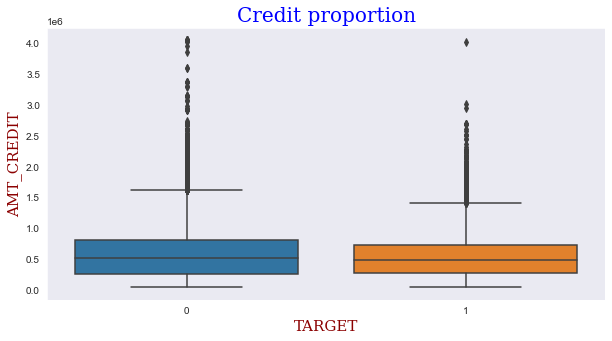

In [49]:
#Visualizing AMT_CREDIT for TARGET 0 and TARGET 1

sns.set_style('dark')
plt.figure(figsize=(10,5))
plt.title('Credit proportion',fontdict=font1)
plt.xlabel("TARGET",fontdict = font2)
plt.ylabel("AMT_CREDIT",fontdict = font2)
sns.boxplot(application['TARGET'], application['AMT_CREDIT'])
plt.show()

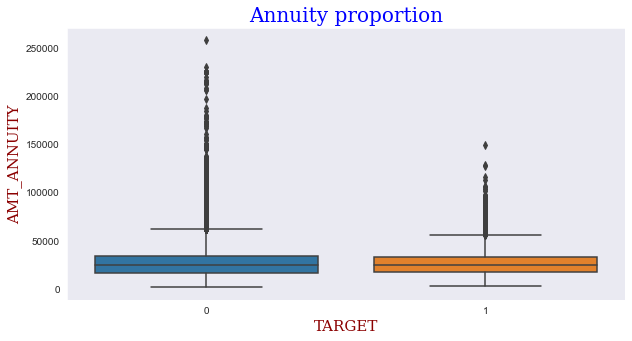

In [50]:
#Visualizing AMT_ANNUITY for TARGET 0 and TARGET 1

sns.set_style('dark')
plt.figure(figsize=(10,5))
plt.title('Annuity proportion',fontdict=font1)
plt.xlabel("TARGET",fontdict = font2)
plt.ylabel("AMT_ANNUITY",fontdict = font2)
sns.boxplot(application['TARGET'], application['AMT_ANNUITY'])
plt.show()

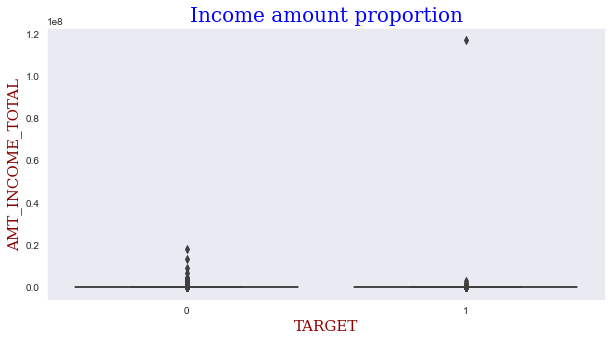

In [51]:
#Visualizing AMT_INCOME_TOTAL for TARGET 0 and TARGET 1

sns.set_style('dark')
plt.figure(figsize=(10,5))
plt.title('Income amount proportion',fontdict=font1)
plt.xlabel("TARGET",fontdict = font2)
plt.ylabel("AMT_INCOME_TOTAL",fontdict = font2)
sns.boxplot(application['TARGET'], application['AMT_INCOME_TOTAL'])
plt.show()


#### Bivariate Analysis for numerical variable

##### Numerical vs Categorical

In [52]:
##CODE_GENDER

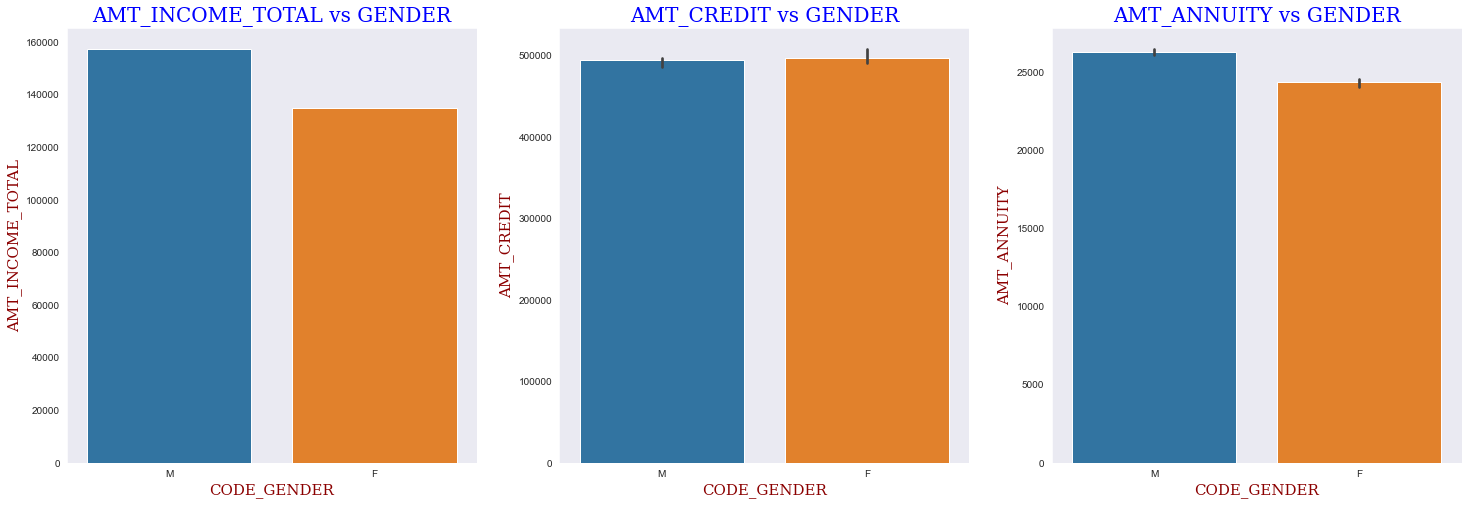

In [53]:
## TARGET 1 analysis for amt_credit,annuity,income vs gender


sns.set_style('dark')
plt.figure(figsize=(25,8))
plt.subplot(1,3,1)
plt.title("AMT_INCOME_TOTAL vs GENDER",fontdict=font1)
plt.xlabel("CODE_GENDER",fontdict = font2)
plt.ylabel("AMT_INCOME_TOTAL",fontdict = font2)
sns.barplot(data=target_1,x="CODE_GENDER",y="AMT_INCOME_TOTAL",estimator=np.median)
plt.subplot(1,3,2)
plt.title("AMT_CREDIT vs GENDER",fontdict=font1)
plt.xlabel("CODE_GENDER",fontdict = font2)
plt.ylabel("AMT_CREDIT",fontdict = font2)
sns.barplot(data=target_1,x="CODE_GENDER",y="AMT_CREDIT",estimator=np.median)
plt.subplot(1,3,3)
plt.title("AMT_ANNUITY vs GENDER",fontdict=font1)
plt.xlabel("CODE_GENDER",fontdict = font2)
plt.ylabel("AMT_ANNUITY",fontdict = font2)
sns.barplot(data=target_1,x="CODE_GENDER",y="AMT_ANNUITY",estimator=np.median)
plt.show()


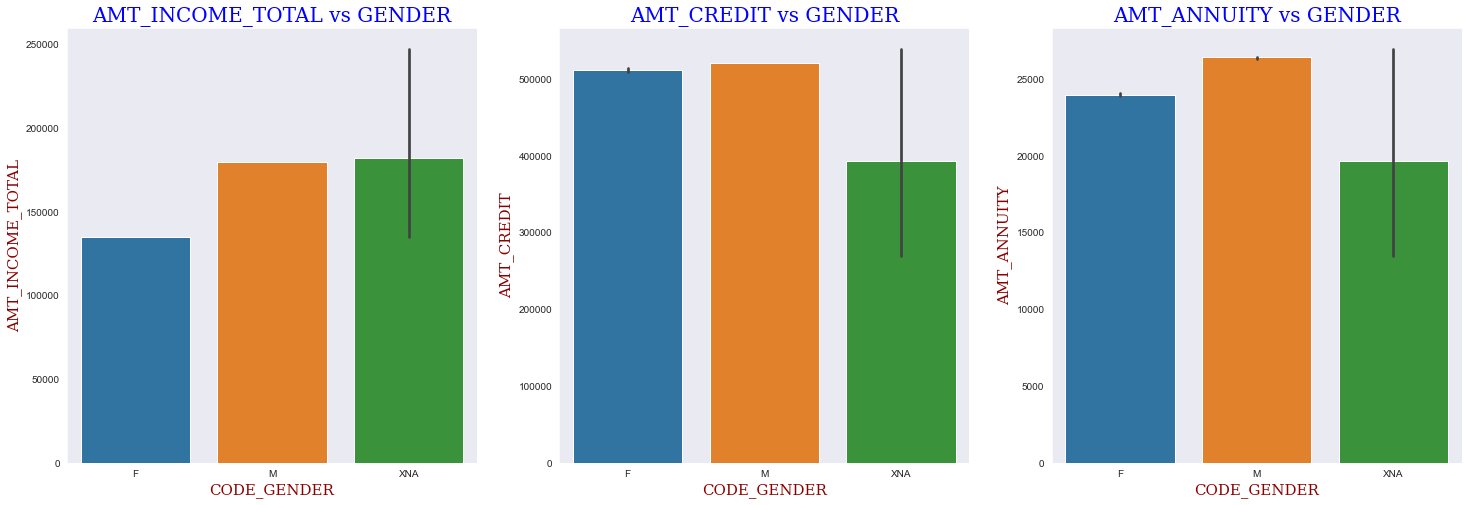

In [54]:
## TARGET 0 analysis for amt_credit,annuity,income vs gender


sns.set_style('dark')
plt.figure(figsize=(25,8))
plt.subplot(1,3,1)
plt.title("AMT_INCOME_TOTAL vs GENDER",fontdict=font1)
plt.xlabel("CODE_GENDER",fontdict = font2)
plt.ylabel("AMT_INCOME_TOTAL",fontdict = font2)
sns.barplot(data=target_0,x="CODE_GENDER",y="AMT_INCOME_TOTAL",estimator=np.median)
plt.subplot(1,3,2)
plt.title("AMT_CREDIT vs GENDER",fontdict=font1)
plt.xlabel("CODE_GENDER",fontdict = font2)
plt.ylabel("AMT_CREDIT",fontdict = font2)
sns.barplot(data=target_0,x="CODE_GENDER",y="AMT_CREDIT",estimator=np.median)
plt.subplot(1,3,3)
plt.title("AMT_ANNUITY vs GENDER",fontdict=font1)
plt.xlabel("CODE_GENDER",fontdict = font2)
plt.ylabel("AMT_ANNUITY",fontdict = font2)
sns.barplot(data=target_0,x="CODE_GENDER",y="AMT_ANNUITY",estimator=np.median)
plt.show()


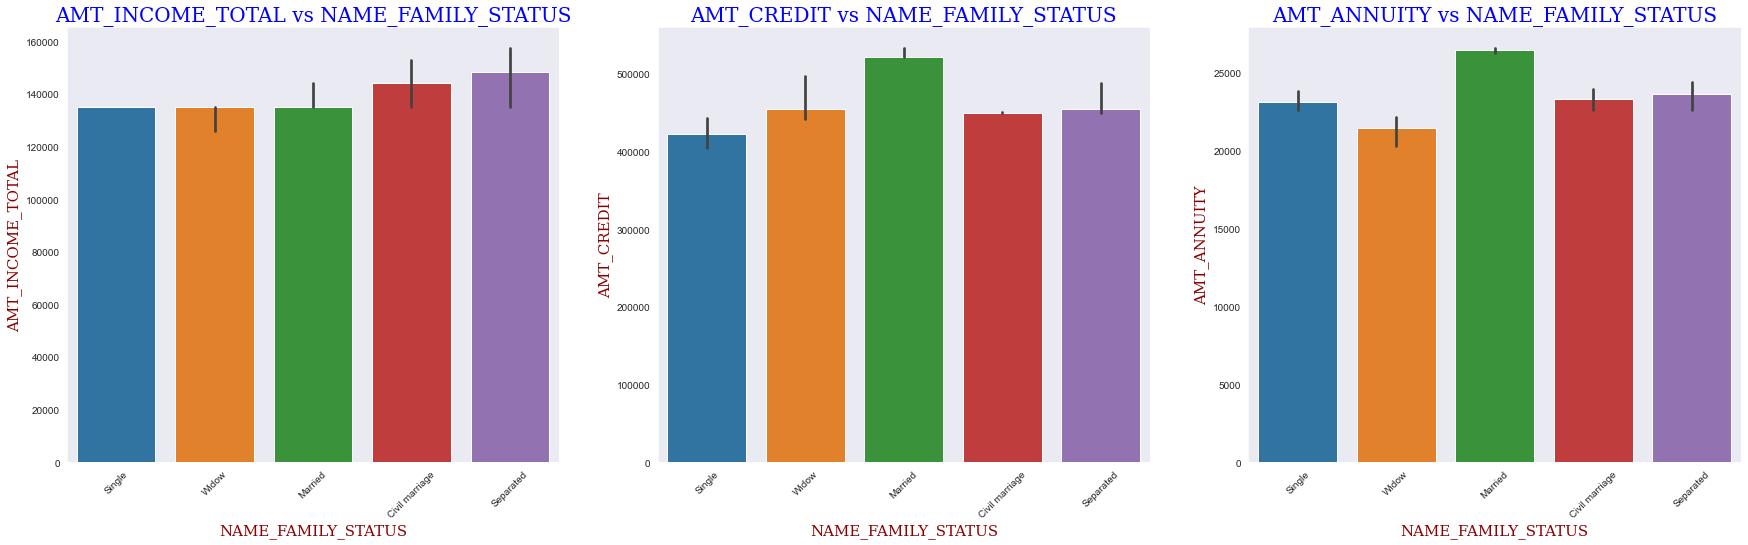

In [55]:
# Target 1 analysis for amt_credit,annuity,income vs family status

sns.set_style('dark')
plt.figure(figsize=(30,8))
plt.subplot(1,3,1)
plt.title("AMT_INCOME_TOTAL vs NAME_FAMILY_STATUS",fontdict=font1)
plt.xticks(rotation=45)
plt.xlabel("NAME_FAMILY_STATUS",fontdict = font2)
plt.ylabel("AMT_INCOME_TOTAL",fontdict = font2)
sns.barplot(data=target_1,x="NAME_FAMILY_STATUS",y="AMT_INCOME_TOTAL",estimator=np.median)
plt.subplot(1,3,2)
plt.title("AMT_CREDIT vs NAME_FAMILY_STATUS",fontdict=font1)
plt.xticks(rotation=45)
plt.xlabel("NAME_FAMILY_STATUS",fontdict = font2)
plt.ylabel("AMT_CREDIT",fontdict = font2)
sns.barplot(data=target_1,x="NAME_FAMILY_STATUS",y="AMT_CREDIT",estimator=np.median)
plt.subplot(1,3,3)
plt.title("AMT_ANNUITY vs NAME_FAMILY_STATUS",fontdict=font1)
plt.xticks(rotation=45)
plt.xlabel("NAME_FAMILY_STATUS",fontdict = font2)
plt.ylabel("AMT_ANNUITY",fontdict = font2)
sns.barplot(data=target_1,x="NAME_FAMILY_STATUS",y="AMT_ANNUITY",estimator=np.median)
plt.show()


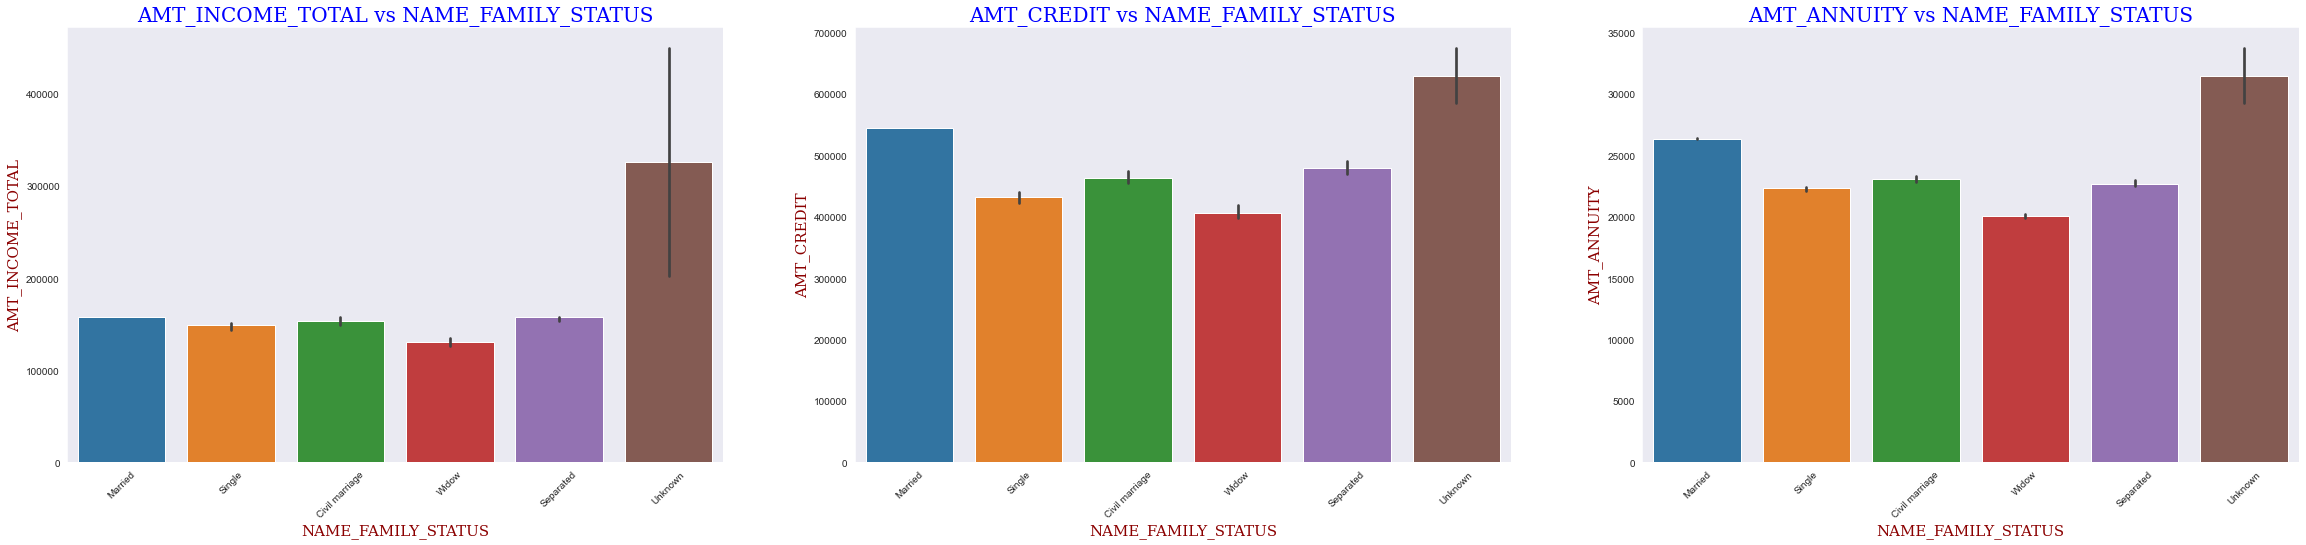

In [56]:
# Target 0 analysis for amt_credit,annuity,income vs family status

sns.set_style('dark')
plt.figure(figsize=(40,8))
plt.subplot(1,3,1)
plt.title("AMT_INCOME_TOTAL vs NAME_FAMILY_STATUS",fontdict=font1)
plt.xticks(rotation=45)
plt.xlabel("NAME_FAMILY_STATUS",fontdict = font2)
plt.ylabel("AMT_INCOME_TOTAL",fontdict = font2)
sns.barplot(data=target_0,x="NAME_FAMILY_STATUS",y="AMT_INCOME_TOTAL",estimator=np.median)
plt.subplot(1,3,2)
plt.title("AMT_CREDIT vs NAME_FAMILY_STATUS",fontdict=font1)
plt.xticks(rotation=45)
plt.xlabel("NAME_FAMILY_STATUS",fontdict = font2)
plt.ylabel("AMT_CREDIT",fontdict = font2)
sns.barplot(data=target_0,x="NAME_FAMILY_STATUS",y="AMT_CREDIT",estimator=np.median)
plt.subplot(1,3,3)
plt.title("AMT_ANNUITY vs NAME_FAMILY_STATUS",fontdict=font1)
plt.xticks(rotation=45)
plt.xlabel("NAME_FAMILY_STATUS",fontdict = font2)
plt.ylabel("AMT_ANNUITY",fontdict = font2)
sns.barplot(data=target_0,x="NAME_FAMILY_STATUS",y="AMT_ANNUITY",estimator=np.median)
plt.show()

##### Numerical vs Numerical

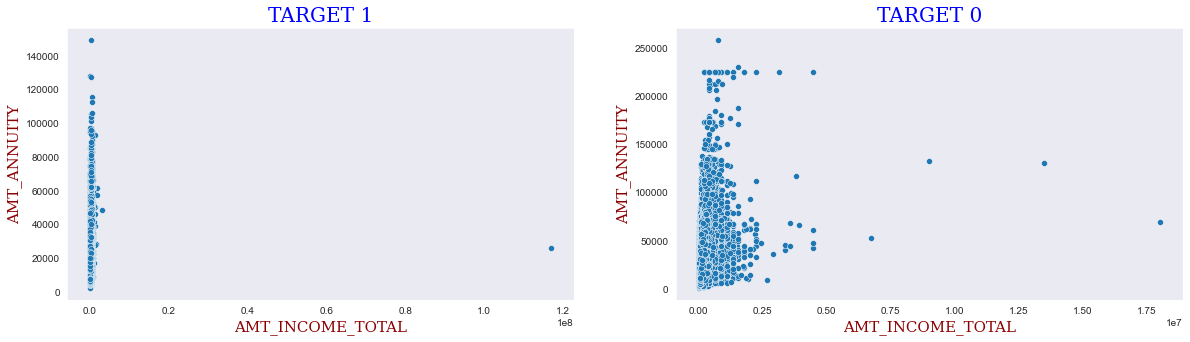

In [57]:
#Visualizing correlation between AMT_INCOME_TOTAL vs AMT_ANNUITY for TARGET 0 and TARGET 1

sns.set_style('dark')
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title("TARGET 1",fontdict=font1)
plt.xlabel("AMT_INCOME_TOTAL",fontdict = font2)
plt.ylabel("AMT_ANNUITY",fontdict = font2)
sns.scatterplot(data=target_1,x="AMT_INCOME_TOTAL",y="AMT_ANNUITY")
plt.subplot(1,2,2)
plt.title("TARGET 0",fontdict=font1)
plt.xlabel("AMT_INCOME_TOTAL",fontdict = font2)
plt.ylabel("AMT_ANNUITY",fontdict = font2)
sns.scatterplot(data=target_0,x="AMT_INCOME_TOTAL",y="AMT_ANNUITY")
plt.show()



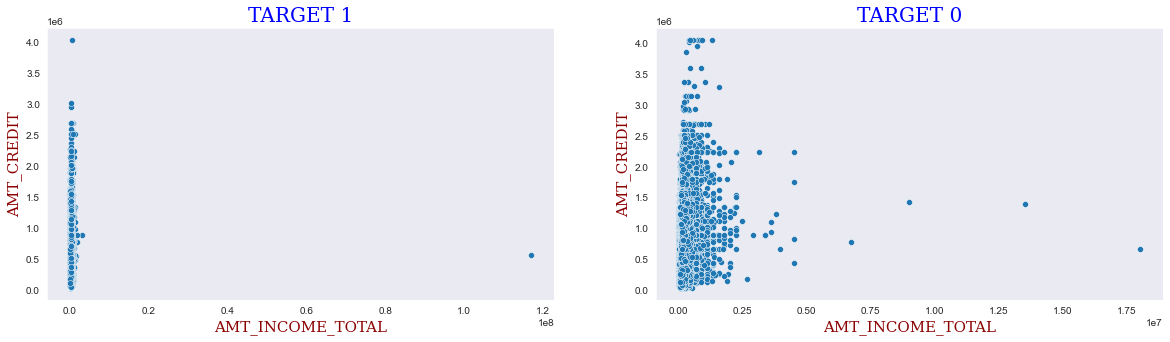

In [58]:
#Visualizing correlation between AMT_INCOME_TOTAL vs AMT_CREDIT for TARGET 0 and TARGET 1

sns.set_style('dark')
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title("TARGET 1",fontdict=font1)
plt.xlabel("AMT_INCOME_TOTAL",fontdict = font2)
plt.ylabel("AMT_CREDIT",fontdict = font2)
sns.scatterplot(data=target_1,x="AMT_INCOME_TOTAL",y="AMT_CREDIT")
plt.subplot(1,2,2)
plt.title("TARGET 0",fontdict=font1)
plt.xlabel("AMT_INCOME_TOTAL",fontdict = font2)
plt.ylabel("AMT_CREDIT",fontdict = font2)
sns.scatterplot(data=target_0,x="AMT_INCOME_TOTAL",y="AMT_CREDIT")
plt.show()

##### Categorical vs Categorical

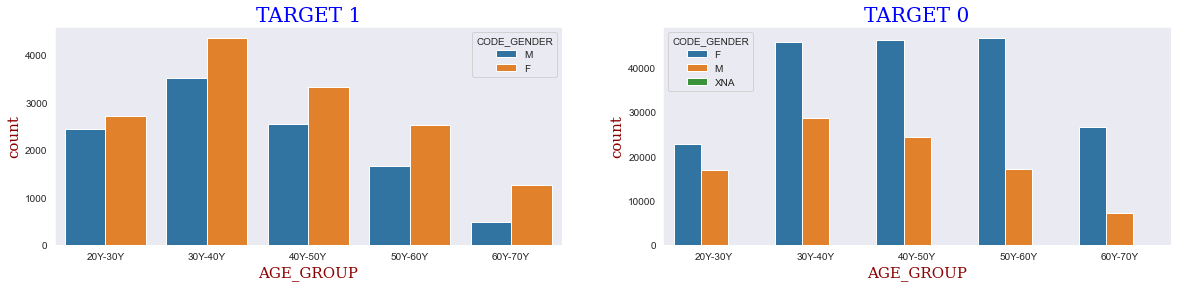

In [59]:
#Visualizing AGE_GROUP and CODE_GENDER for TARGET 0 and TARGET 1

plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("TARGET 1",fontdict=font1)
plt.xlabel("AGE_GROUP",fontdict = font2)
plt.ylabel("CODE_GENDER",fontdict = font2)
sns.countplot('AGE_GROUP', hue = 'CODE_GENDER', data =target_1)
plt.subplot(1,2,2)
plt.title("TARGET 0",fontdict=font1)
plt.xlabel("AGE_GROUP",fontdict = font2)
plt.ylabel("CODE_GENDER",fontdict = font2)
sns.countplot('AGE_GROUP', hue = 'CODE_GENDER', data =target_0)

plt.show()


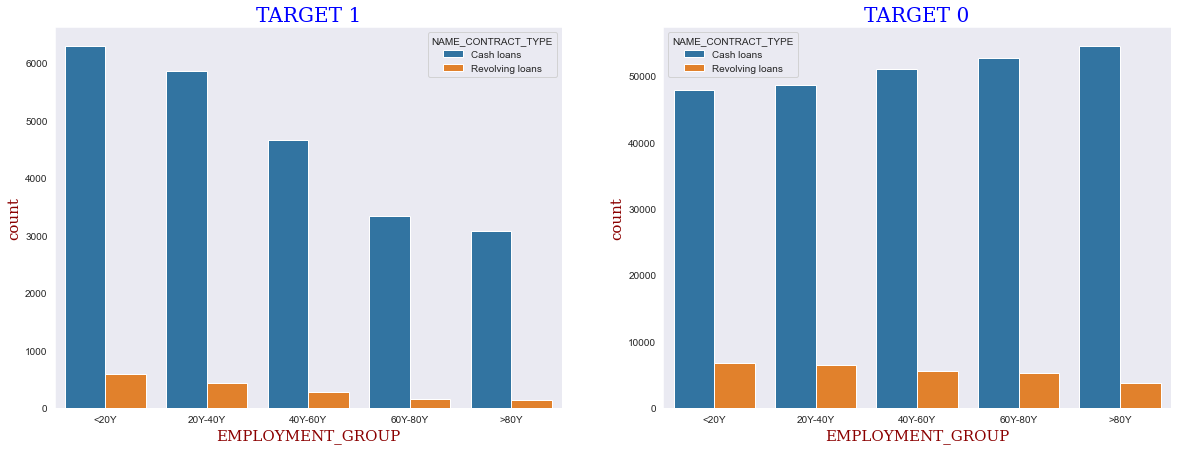

In [60]:
#Visualizing EMPLOYMENT_GROUP and NAME_CONTRACT_TYPE for TARGET 0 and TARGET 1

plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
plt.title("TARGET 1",fontdict=font1)
plt.xlabel("EMPLOYMENT_GROUP",fontdict = font2)
plt.ylabel("CODE_GENDER",fontdict = font2)
sns.countplot('EMPLOYMENT_GROUP', hue = 'NAME_CONTRACT_TYPE', data =target_1)
plt.subplot(1,2,2)
plt.title("TARGET 0",fontdict = font1)
plt.xlabel("EMPLOYMENT_GROUP",fontdict = font2)
plt.ylabel("CODE_GENDER",fontdict = font2)
sns.countplot('EMPLOYMENT_GROUP', hue = 'NAME_CONTRACT_TYPE', data =target_0)
plt.show()


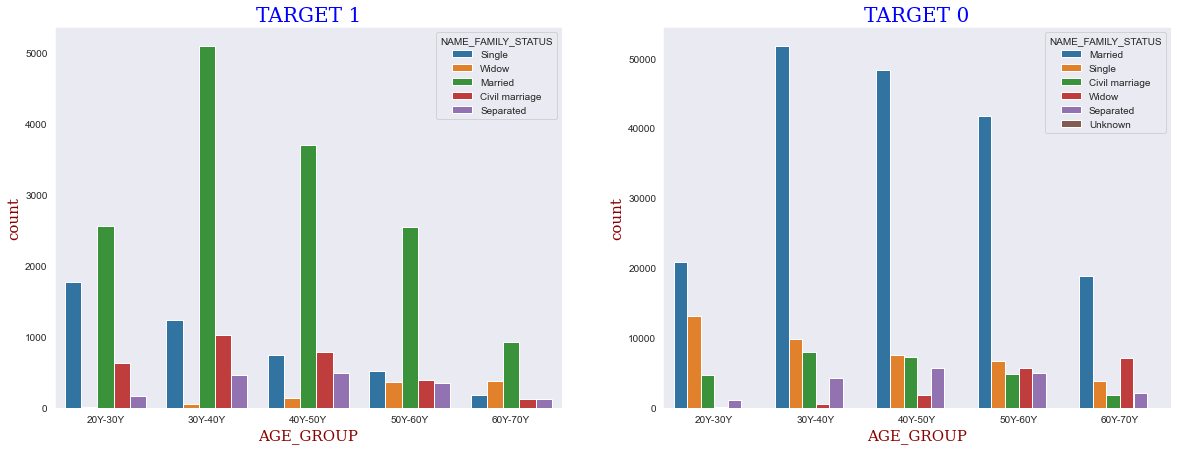

In [61]:
#Visualizing AGE_GROUP and NAME_FAMILY_STATUS for TARGET 0 and TARGET 1

plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
plt.title("TARGET 1",fontdict=font1)
plt.xlabel("EMPLOYMENT_GROUP",fontdict = font2)
plt.ylabel("NAME_FAMILY_STATUS",fontdict = font2)
sns.countplot('AGE_GROUP', hue = 'NAME_FAMILY_STATUS', data =target_1)
plt.subplot(1,2,2)
plt.title("TARGET 0",fontdict=font1)
plt.xlabel("EMPLOYMENT_GROUP",fontdict = font2)
plt.ylabel("NAME_FAMILY_STATUS",fontdict = font2)
sns.countplot('AGE_GROUP', hue = 'NAME_FAMILY_STATUS', data =target_0)
plt.show()


##### Multivariate Analysis

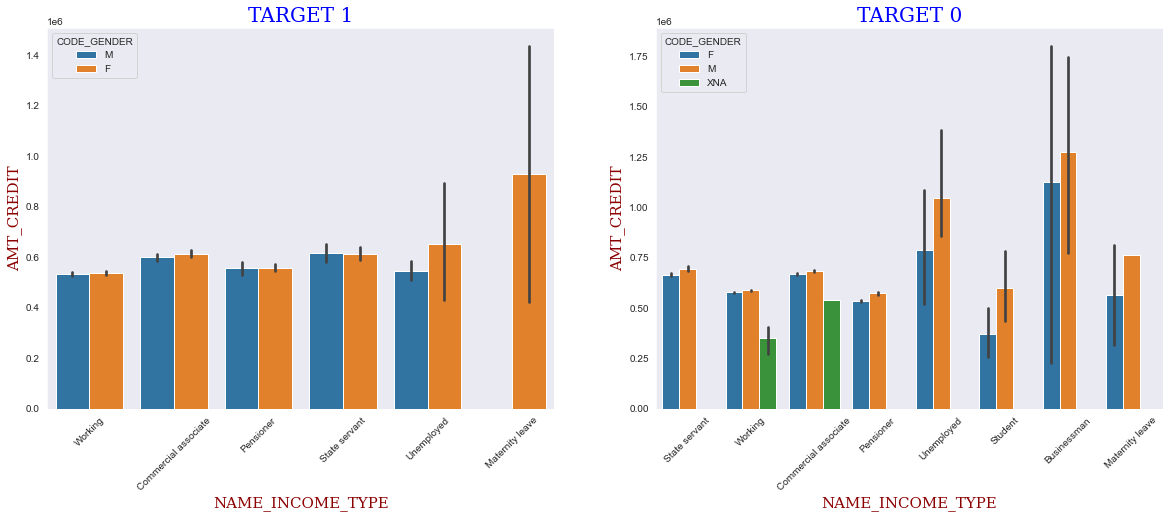

In [62]:
#Visualizing NAME_INCOME_TYPE, AMT_CREDIT and CODE_GENDER for TARGET 0 and TARGET 1


plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
plt.title("TARGET 1",fontdict=font1)
plt.xlabel("NAME_INCOME_TYPE",fontdict = font2)
plt.xticks(rotation=45)
plt.ylabel("AMT_CREDIT",fontdict = font2)
sns.barplot(x="NAME_INCOME_TYPE" , y="AMT_CREDIT" , hue ="CODE_GENDER" , data = target_1 )
plt.subplot(1,2,2)
plt.title("TARGET 0",fontdict=font1)
plt.xlabel("NAME_INCOME_TYPE",fontdict = font2)
plt.xticks(rotation=45)
plt.ylabel("AMT_CREDIT",fontdict = font2)
sns.barplot(x="NAME_INCOME_TYPE" , y="AMT_CREDIT" , hue ="CODE_GENDER" , data = target_0 )
plt.show()

## Conclusion:

##### • TARGET 0 (pay on time) is higher than TARGET 1(Defaulter).
##### • Female defaulters are higher.
##### • Cash Loans are defaulted more.
##### • Married applicants are more likely to default.
##### • Employees with less than 20 years of experience are more likely to default.
##### • Employees in the Age group range 30 to 40 are more likely to default.
##### • Secondary education type has higher default rate.
##### • Working applicants are more likely to default.
##### • The correlation looks similar for TARGET 0(who Pays on time) and TARGET 1(Defaulters).
##### • Females in the age-group of 30-40 years are more likely to default.
##### • Married applicants in the age group of 30-40 years are more likely to default on their loans.